In [13]:
# Abhishek Krishna 
# Raman Keswani

# collecting Tweets and saving in CSV

library(twitteR)
library(ggmap)
library(maps)      
library(rlist)
api_key <- "4labAgN3hljf7lJCe44d8smWm" 
api_secret <- "Au1jUW42RaxIzVIt1NllbLYvpexYTlEJKPGdMWk8Z1bt23ctGq"
token <- "272088680-wI4dhRPrlUTPVreyzdKajFpx67tiAp9h8cdR4adp"
token_secret <- "C4CUQ68wt74uNx5yjhEE0EgqNTbmIwnYjeoVZOgxppZVh"

setup_twitter_oauth(api_key, api_secret, token, token_secret)

tweetSearched = searchTwitter('#FLU', geocode='39.0119,-98.48425,2500mi', n = 30)

tweet_df = twListToDF(tweetSearched)
write.csv(tweet_df, "tweet_data_tst.csv")

[1] "Using direct authentication"


In [ ]:
# Username lookup

usernames_df = twListToDF(lookupUsers(tweet_df$screenName))
write.csv(usernames_df, "usernames_tst.csv")

lat = c()
lon = c()

# Fetching geocodes from User's location data

for(i in 1:length(usernames_df$location)){
  if(grepl(',', usernames_df$location[i], fixed = TRUE)){
    temp = geocode(usernames_df$location[i])
    lat[i] = temp$lat
    lon[i] = temp$lon
  }
  else{
    next
  }
  
}

lat = na.omit(lat)
lon = na.omit(lon)
latlon_df = data.frame(lat, lon)
write.csv(latlon_df, "latlon_df_tst.csv")

In [11]:
# Fetching user's states

geo_information_rev = c()
for(i in 1:length(latlon_df$lat))
{
  #print(c(lat_lon_df$lon[3], lat_lon_df$lat[3]))
  geo_information_rev[i] <- list(revgeocode(c(latlon_df$lon[i], latlon_df$lat[i]),output = c("more")))
}

geo_information_rev = na.omit(geo_information_rev)
filteredData_NEW = list.filter(geo_information_rev, address != 'NA')
filteredData_NEW2 = list.filter(filteredData_NEW, country =='United States')

states_all = c()
for(i in 1:length(filteredData_NEW2)){
  states_all[i] = levels(filteredData_NEW2[[i]]$administrative_area_level_1)
}

write.csv(states_all, "states_data_tst.csv")

Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=38.9536174,-94.7335709&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=40.9012101,-74.5143232&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=33.7489954,-84.3879824&sensor=false
Warning message in revgeocode(c(latlon_df$lon[i], latlon_df$lat[i]), output = c("more")):
"reverse geocode failed - bad location? location = "-73.8648268"reverse geocode failed - bad location? location = "40.8447819""Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=33.7489954,-84.3879824&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=50.768035,0.290472&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=41.6005448,-93.6091064&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=42.3600825,-71.058


Attaching package: 'plyr'

The following object is masked from 'package:maps':

    ozone

The following object is masked from 'package:twitteR':

    id



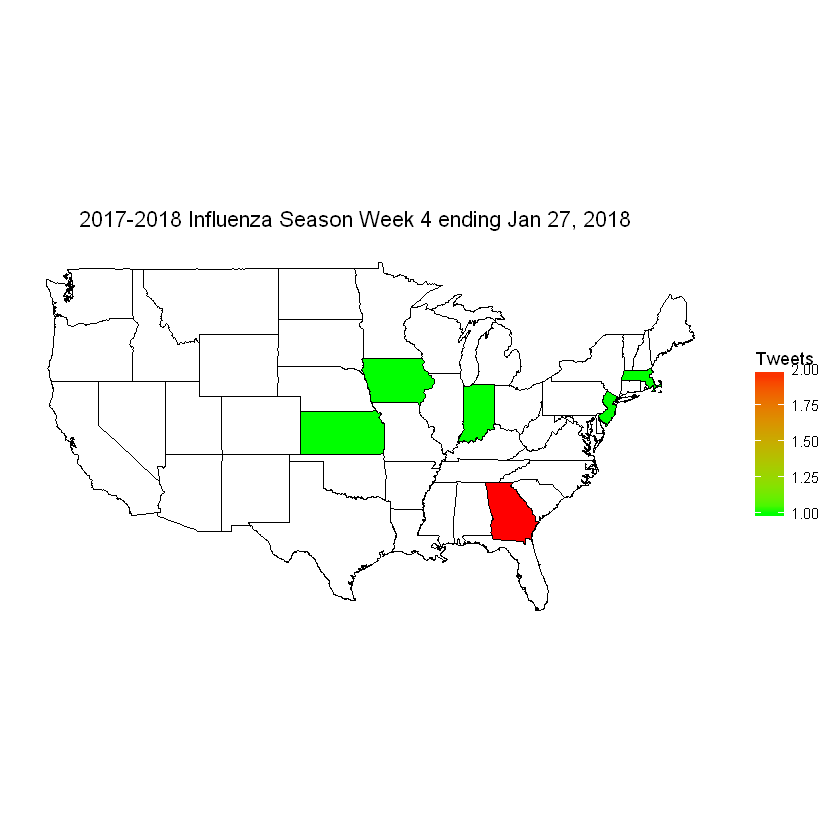

In [12]:
library(plyr)
library(maps)      
library(ggplot2)

states_all = read.csv(file = "states_data_tst.csv")

states_all = tolower(states_all$x)
facMyStates = factor(states_all)
dataTemp = count(facMyStates)
dataTemp$STATENAME = dataTemp$x
dataTemp$x = c(1:length(dataTemp$x))
dataTemp$Tweets = dataTemp$freq

theme_opts = list(theme(panel.grid.minor = element_blank(),
                        panel.grid.major = element_blank(),
                        panel.background = element_blank(),
                        plot.background = element_blank(),
                        panel.border = element_blank(),
                        axis.line = element_blank(),
                        axis.text.x = element_blank(),
                        axis.text.y = element_blank(),
                        axis.ticks = element_blank(),
                        axis.title.x = element_blank(),
                        axis.title.y = element_blank(),
                        legend.text = element_text(),
                        legend.position="right"))

map <- map_data("state")
ggplot(data = dataTemp) + ggtitle("           2017-2018 Influenza Season Week 4 ending Jan 27, 2018") +
  geom_polygon(data = map,aes(x=long, y = lat, group = group), fill = NA, color="black", size=0.25) +
  geom_map(data = dataTemp, color = "black", map = map, aes(map_id = STATENAME, fill = Tweets)) +
  coord_map()+
  theme_opts+
  scale_fill_continuous(low= "green", high="red",  space = "Lab",na.value="white",guide="colorbar")